# Import libraries

In [81]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
import squarify as sq
from matplotlib.ticker import PercentFormatter
#from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

pd.set_option('display.max_columns', None)
#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

## Importing data set

In [4]:
df=pd.read_csv('listings.csv',low_memory=False)

### Exploring the DataFrame

In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42384166,https://www.airbnb.com/rooms/42384166,20220920074636,2022-09-20,city scrape,Practical Apartment,The apartment just got renovated! The simple b...,NaN,https://a0.muscache.com/pictures/49b4fdd9-78ea...,337177735,https://www.airbnb.com/users/show/337177735,Dna,2020-02-18,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/ef435...,https://a0.muscache.com/im/pictures/user/ef435...,NaN,1.0,1.0,"['email', 'phone']",t,f,NaN,ΝΕΟΣ ΚΟΣΜΟΣ,NaN,37.94835,23.70327,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""First aid kit"", ""Shampoo"", ""Hangers"", ""TV"", ...",$35.00,2,7,2,2,1125,1125,2.0,1125.0,NaN,t,25,55,85,360,2022-09-20,30,21,3,2020-02-23,2022-09-01,4.37,4.33,4.63,4.80,4.67,4.47,4.40,00001374706,t,1,1,0,0,0.96
1,31100111,https://www.airbnb.com/rooms/31100111,20220920074636,2022-09-20,city scrape,Σπιτι 2ος κοντα στο ηλεκτρικο καλλιθεας Αττικης,Προσφατα ανακαινισμένο διαμερισμα ενος μεγαλου...,η γειτονια γενικα ειναι ήσυχη,https://a0.muscache.com/pictures/4be77902-7337...,90434832,https://www.airbnb.com/users/show/90434832,Dimos,2016-08-17,"Athens, Greece",ειμαι Ελληνας εχω οικογενεια και μου αρέσει να...,within a few hours,100%,0%,f,https://a0.muscache.com/im/pictures/user/9f4e7...,https://a0.muscache.com/im/pictures/user/9f4e7...,NaN,8.0,9.0,"['email', 'phone']",t,t,"Kallithea, Greece",ΠΕΤΡΑΛΩΝΑ,NaN,37.95633,23.69534,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Hangers"", ""Bathtub"", ""Cooking basics"", ""Pati...",$22.00,7,90,7,7,1125,1125,7.0,1125.0,NaN,t,0,0,0,74,2022-09-20,6,0,0,2019-06-07,2020-10-06,3.67,3.50,3.33,3.83,4.00,4.17,3.83,NaN,t,3,3,0,0,0.15
2,36967991,https://www.airbnb.com/rooms/36967991,20220920074636,2022-09-20,city scrape,Lux Studio 1,5 λεπτά από τον ηλεκτρικό σταθμό Καλλιθέας. Εύ...,Ευχάριστη γειτονιά με έντονο ελληνικό χαρακτήρ...,https://a0.muscache.com/pictures/c19a4a64-da8b...,277896558,https://www.airbnb.com/users/show/277896558,Kalliopi,2019-07-21,"Alimos, Greece",NaN,within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/ded7c...,https://a0.muscache.com/im/pictures/user/ded7c...,NaN,2.0,2.0,"['email', 'phone']",t,t,"Kallithea, Greece",ΠΕΤΡΑΛΩΝΑ,NaN,37.95672,23.69589,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Air conditioning"", ""Dishes and silverware"", ...",$36.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,2,20,50,325,2022-09-20,112,15,1,2019-07-26,2022-09-08,4.85,4.91,4.90,4.85,4.90,4.78,4.79,00000770524,t,2,2,0,0,2.91
3,638115689290380035,https://www.airbnb.com/rooms/638115689290380035,20220920074636,2022-09-20,city scrape,Όμορφο διαμέρισμα στον Άγιο Ιωάννη Ρέντη,Απολαύστε μια εμπειρία γεμάτη στιλ σε αυτόν το...,N

In [6]:
#df.info()

In [7]:
#[{i:df[i].nunique()} for i in df.columns]

In [8]:
#[{i:df[i].nunique()} for i in df.columns]

## Notes (Exploring on DataFrame)

In [9]:
#df['name'][0]

In [10]:
#df['description'][0]

In [11]:
#df['neighborhood_overview'][0]

In [12]:
#df['picture_url'][0]

In [13]:
#list(df['room_type'].unique())

In [14]:
#len(list(df['instant_bookable'].dropna()))

In [15]:
#df[['minimum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm']]

In [16]:
#list(df['room_type'].unique())

In [17]:
#len(df[df['host_identity_verified']=='f'])

In [18]:
#df[df['minimum_nights']>=30]['minimum_nights'].count()

In [19]:
#df[df['has_availability']=='t']['has_availability'].count()

In [20]:
#df['calculated_host_listings_count']==df['host_total_listings_count']

------------

# Keeping the column names that we needed for the analysis

In [21]:
x=['id','host_id','host_since','host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_neighbourhood','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','latitude','longitude','room_type','accommodates','bathrooms_text','bedrooms','beds','amenities','price','minimum_nights','number_of_reviews','number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','calculated_host_listings_count','reviews_per_month','license']
df=df[x]
#df.head()

In [22]:
#df.info()

In [23]:
#df.describe()

# Cleaning  columns

#### Datetime variables

In [24]:
df['first_review'] = pd.to_datetime(df["first_review"])
df['last_review'] = pd.to_datetime(df["last_review"])
df['host_since'] = pd.to_datetime(df["host_since"])

#### Turning 't' & 'f' values to True and False

In [25]:
df['host_is_superhost']=df['host_is_superhost'].replace('t','True',regex=True)
df['host_is_superhost']=df['host_is_superhost'].replace('f','False',regex=True)
df['host_has_profile_pic']=df['host_has_profile_pic'].replace('t','True',regex=True)
df['host_has_profile_pic']=df['host_has_profile_pic'].replace('f','False',regex=True)
df['host_identity_verified']=df['host_identity_verified'].replace('t','True',regex=True)
df['host_identity_verified']=df['host_identity_verified'].replace('f','False',regex=True)
df['instant_bookable']=df['instant_bookable'].replace('t','True',regex=True)
df['instant_bookable']=df['instant_bookable'].replace('f','False',regex=True)

#### Fixing Price

In [26]:
df['price']=df['price'].str.replace('$','',regex=True)
df['price']=df['price'].str.replace(',','',regex=True)
df['price']=df['price'].apply(float)

In [27]:
#df['price'].sort_values(ascending=False).head()

In [28]:
#df['price'].sort_values(ascending=False).tail()

#### Fixing the bathrooms_text column

In [29]:
def shared_bath(x):
    if ('shared' or 'Shared') in x:
        return True
    else:
        return False
    
df['bathrooms_count']=df['bathrooms_text'].str.replace(r'[^0-9.]','',regex=True)
df['bathrooms_count']=df['bathrooms_text'].str.extract('(\d+)')

df['shared_bath']=df['bathrooms_text'].astype(str).apply(shared_bath)

#### Holding a new DataFrame

In [30]:
df1=df.copy()
df1.head()

,id,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,license,bathrooms_count,shared_bath
0,42384166,337177735,2020-02-18,NaN,within an hour,100%,100%,False,NaN,"['email', 'phone']",True,False,ΝΕΟΣ ΚΟΣΜΟΣ,37.94835,23.70327,Entire home/apt,2,1 bath,1.0,1.0,"[""First aid kit"", ""Shampoo"", ""Hangers"", ""TV"", ...",35.0,2,30,21,2020-02-23,2022-09-01,4.37,4.33,4.63,4.80,4.67,4.47,4.40,True,1,0.96,00001374706,1,False
1,31100111,90434832,2016-08-17,ειμαι Ελληνας εχω οικογενεια και μου αρέσει να...,within a few hours,100%,0%,False,NaN,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95633,23.69534,Entire home/apt,3,1 bath,1.0,3.0,"[""Hangers"", ""Bathtub"", ""Cooking basics"", ""Pati...",22.0,7,6,0,2019-06-07,2020-10-06,3.67,3.50,3.33,3.83,4.00,4.17,3.83,True,3,0.15,NaN,1,False
2,36967991,277896558,2019-07-21,NaN,within an hour,100%,96%,True,NaN,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95672,23.69589,Entire home/apt,2,1 bath,1.0,1.0,"[""Air conditioning"", ""Dishes and silverware"", ...",36.0,2,112,15,2019-07-26,2022-09-08,4.85,4.91,4.90,4.85,4.90,4.78,4.79,True,2,2.91,00000770524,1,False
3,638115689290380035,461642253,2022-05-30,NaN,within a few hours,100%,NaN,False,NaN,"['email', 'phone']",False,False,ΡΟΥΦ,37.96567,23.67686,Entire home/apt,4,2 baths,2.0,3.0,"[""Long term stays allowed"", ""TV"", ""Wifi"", ""Kit...",80.0,2,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,NaN,00001592182,2,False
4,20824802,748818,2011-06-27,Hi everyone!\n\nThank you for considering stay...,within an hour,96%,93%,False,Kolonaki,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95961,23.70250,Entire home/apt,4,1 bath,2.0,4.0,"[""Hangers"", ""Cooking basics"", ""Elevator"", ""Sha...",120.0,1,13,9,2018-08-03,2022-07-25,5.00,4.92,5.00,5.00,4.92,4.92,5.00,True,76,0.26,1404941,1,False


#### Saving the DataFrame

In [91]:
#df1.to_csv('main.csv', encoding='utf-8')

# Creating Host DataFrame

In [31]:
#Making the rating for the host
df['host_rating']=(df['review_scores_rating']+df['review_scores_accuracy']+df['review_scores_cleanliness']+df['review_scores_checkin']+df['review_scores_communication']+df['review_scores_location']+df['review_scores_value'])/7

#columns for the host DataFrame
host_char=['host_id','host_about','number_of_reviews','first_review','last_review','calculated_host_listings_count','host_is_superhost','host_response_time','host_response_rate','host_acceptance_rate','host_has_profile_pic','id','host_identity_verified','host_verifications','host_rating']
df_host=df[host_char]
df_host

# We create a new column for weighted_score, the number of reviews play a significatnt role

df_host["weighted_rating"] = df_host["host_rating"] * df_host["number_of_reviews"]

# Then we create the normalized score
df_host["normalized_weighted_rating"] = (df_host["weighted_rating"] - df_host["weighted_rating"].min()) \
                                                / (df_host["weighted_rating"].max() - df_host["weighted_rating"].min()) * 100
df_host.sort_values('normalized_weighted_rating', ascending=False, inplace=True)

In [32]:
df_host.head()

,host_id,host_about,number_of_reviews,first_review,last_review,calculated_host_listings_count,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,id,host_identity_verified,host_verifications,host_rating,weighted_rating,normalized_weighted_rating
324,6442400,"Hi, I'm Rio, I was born in Scotland, Edinburg...",798,2013-06-05,2022-09-10,1,True,within an hour,100%,99%,True,1177492,True,"['email', 'phone']",4.830000,3854.340000,100.000000
430,14538849,Cool and reasonable,755,2014-07-07,2022-09-14,3,True,within an hour,100%,100%,True,3431705,True,"['email', 'phone']",4.860000,3669.300000,95.198288
11795,95253933,My name is Georgia Vergou. I'm a civil enginee...,716,2017-02-12,2022-09-17,1,True,within an hour,100%,100%,True,15064259,True,"['email', 'phone']",4.921429,3523.742857,91.421140
1073,78047615,NaN,677,2016-06-22,2022-09-05,1,True,within an hour,100%,100%,True,13553080,True,"['email', 'phone']",4.887143,3308.595714,85.838161
1204,90390850,a,668,2016-08-22,2022-09-06,63,False,within an hour,100%,100%,True,14583913,True,"['email', 'phone', 'work_email']",4.824286,3222.622857,83.607200


In [33]:
#df_host.info()

## Cleaning the first/last review dates in host DataFrame 

In [34]:
df_host['active_days_of_rating'] = (df_host['last_review'] - df_host['first_review']).dt.days
df_host.drop(columns = ['last_review','first_review'], inplace= True)
df_host['active_days_of_rating'].unique()

array([3384., 2991., 2043., ..., 2053.,    0.,   nan])

In [35]:
#df_host.head()

## Counting the elements of the host_verifications column

In [36]:
def verification_len(x):
    try:
        return len(eval(x))
    except:
        pass

df_host['number_of_verifications']= df_host['host_verifications'].apply(verification_len)
#eval(df_host['host_verifications'][135])
               
df_host

,host_id,host_about,number_of_reviews,calculated_host_listings_count,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,id,host_identity_verified,host_verifications,host_rating,weighted_rating,normalized_weighted_rating,active_days_of_rating,number_of_verifications
324,6442400,"Hi, I'm Rio, I was born in Scotland, Edinburg...",798,1,True,within an hour,100%,99%,True,1177492,True,"['email', 'phone']",4.830000,3854.340000,100.000000,3384.0,2.0
430,14538849,Cool and reasonable,755,3,True,within an hour,100%,100%,True,3431705,True,"['email', 'phone']",4.860000,3669.300000,95.198288,2991.0,2.0
11795,95253933,My name is Georgia Vergou. I'm a civil enginee...,716,1,True,within an hour,100%,100%,True,15064259,True,"['email', 'phone']",4.921429,3523.742857,91.421140,2043.0,2.0
1073,78047615,NaN,677,1,True,within an hour,100%,100%,True,13553080,True,"['email', 'phone']",4.887143,3308.595714,85.838161,2266.0,2.0
1204,90390850,a,668,63,False,within an hour,100%,100%,True,14583913,True,"['email', 'phone', 'work_email']",4.824286,3222.622857,83.607200,2206.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12153,77885637,NaN,0,1,False,within an hour,100%,67%,True,613699298786104465,False,"['email', 'phone']",NaN,NaN,NaN,NaN,2.0
12156,38143867,NaN,0,3,False,within a day,100%,100%,True,45409658,True,"['email', 'phone']",NaN,NaN,NaN,NaN,2.0
12162,475302705,NaN,0,1,False,within an hour,100%,100%,True,695455925106775057,False,"['email', 'phone']",NaN,NaN,NaN,NaN,2.0
12163,475401320,NaN,0,1,False,NaN,NaN,NaN,True,696025981798812717,False,"['email', 'phone']",NaN,NaN,NaN,NaN,2.0


## Tryouts

In [37]:
df_host.head()

,host_id,host_about,number_of_reviews,calculated_host_listings_count,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,id,host_identity_verified,host_verifications,host_rating,weighted_rating,normalized_weighted_rating,active_days_of_rating,number_of_verifications
324,6442400,"Hi, I'm Rio, I was born in Scotland, Edinburg...",798,1,True,within an hour,100%,99%,True,1177492,True,"['email', 'phone']",4.830000,3854.340000,100.000000,3384.0,2.0
430,14538849,Cool and reasonable,755,3,True,within an hour,100%,100%,True,3431705,True,"['email', 'phone']",4.860000,3669.300000,95.198288,2991.0,2.0
11795,95253933,My name is Georgia Vergou. I'm a civil enginee...,716,1,True,within an hour,100%,100%,True,15064259,True,"['email', 'phone']",4.921429,3523.742857,91.421140,2043.0,2.0
1073,78047615,NaN,677,1,True,within an hour,100%,100%,True,13553080,True,"['email', 'phone']",4.887143,3308.595714,85.838161,2266.0,2.0
1204,90390850,a,668,63,False,within an hour,100%,100%,True,14583913,True,"['email', 'phone', 'work_email']",4.824286,3222.622857,83.607200,2206.0,3.0


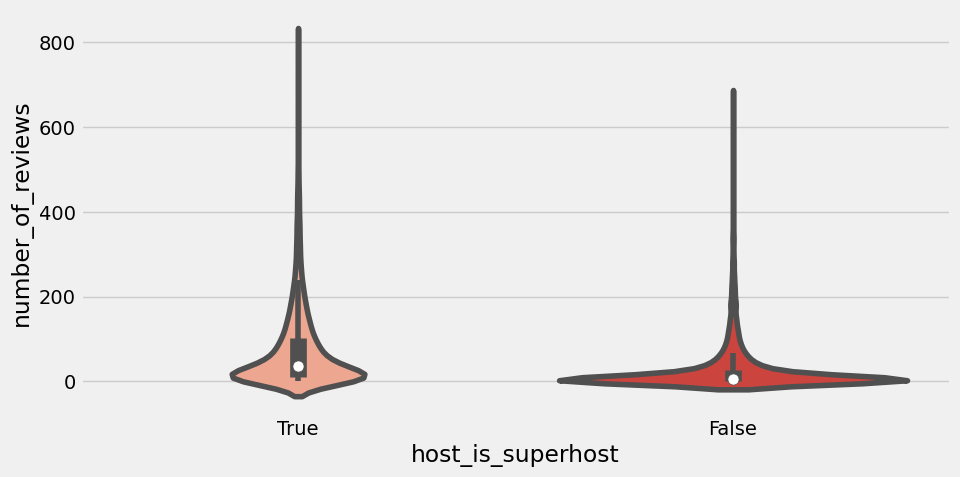

In [38]:
sns.violinplot(data=df_host, y="number_of_reviews",x='host_is_superhost',split=True,palette='Reds')
None

## Fixing the percentages in the two columns of host DataFrame

In [39]:
df_host['host_response_rate']=df_host['host_response_rate'].replace('%','',regex=True).astype(float)
df_host['host_acceptance_rate']=df_host['host_acceptance_rate'].replace('%','',regex=True).astype(float)

In [87]:
#df_host.head()

#### Saving Host DataFrame

In [89]:
#df_host.to_csv('host.csv', encoding='utf-8')

---------------------------------------------

In [40]:
df_host1= df_host.groupby('host_id').agg({'host_rating': np.mean, 'active_days_of_rating': np.sum,'calculated_host_listings_count': np.sum,'host_about': 'count'}).reset_index().sort_values('host_about', ascending= False)
#df_host1.head(20)

In [41]:
#df_host.info()

## Plotting to see the relationship between verified, response rate & superhost

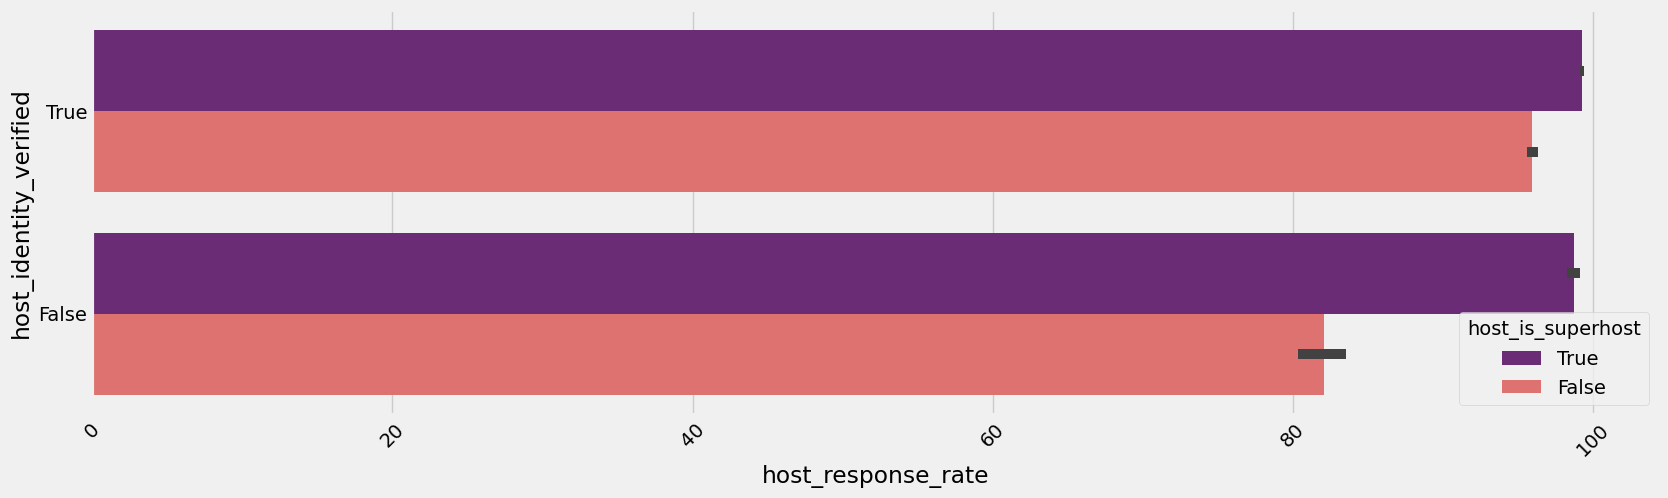

In [42]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='host_response_rate', y = 'host_identity_verified', hue='host_is_superhost', palette = "magma", data=df_host)
plt.setp(ax.get_xticklabels(), rotation=45)
None

In [43]:
df.head()

,id,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,license,bathrooms_count,shared_bath,host_rating
0,42384166,337177735,2020-02-18,NaN,within an hour,100%,100%,False,NaN,"['email', 'phone']",True,False,ΝΕΟΣ ΚΟΣΜΟΣ,37.94835,23.70327,Entire home/apt,2,1 bath,1.0,1.0,"[""First aid kit"", ""Shampoo"", ""Hangers"", ""TV"", ...",35.0,2,30,21,2020-02-23,2022-09-01,4.37,4.33,4.63,4.80,4.67,4.47,4.40,True,1,0.96,00001374706,1,False,4.524286
1,31100111,90434832,2016-08-17,ειμαι Ελληνας εχω οικογενεια και μου αρέσει να...,within a few hours,100%,0%,False,NaN,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95633,23.69534,Entire home/apt,3,1 bath,1.0,3.0,"[""Hangers"", ""Bathtub"", ""Cooking basics"", ""Pati...",22.0,7,6,0,2019-06-07,2020-10-06,3.67,3.50,3.33,3.83,4.00,4.17,3.83,True,3,0.15,NaN,1,False,3.761429
2,36967991,277896558,2019-07-21,NaN,within an hour,100%,96%,True,NaN,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95672,23.69589,Entire home/apt,2,1 bath,1.0,1.0,"[""Air conditioning"", ""Dishes and silverware"", ...",36.0,2,112,15,2019-07-26,2022-09-08,4.85,4.91,4.90,4.85,4.90,4.78,4.79,True,2,2.91,00000770524,1,False,4.854286
3,638115689290380035,461642253,2022-05-30,NaN,within a few hours,100%,NaN,False,NaN,"['email', 'phone']",False,False,ΡΟΥΦ,37.96567,23.67686,Entire home/apt,4,2 baths,2.0,3.0,"[""Long term stays allowed"", ""TV"", ""Wifi"", ""Kit...",80.0,2,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,NaN,00001592182,2,False,NaN
4,20824802,748818,2011-06-27,Hi everyone!\n\nThank you for considering stay...,within an hour,96%,93%,False,Kolonaki,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95961,23.70250,Entire home/apt,4,1 bath,2.0,4.0,"[""Hangers"", ""Cooking basics"", ""Elevator"", ""Sha...",120.0,1,13,9,2018-08-03,2022-07-25,5.00,4.92,5.00,5.00,4.92,4.92,5.00,True,76,0.26,1404941,1,False,4.965714


# See how some slices affect the shape of DataFrame

In [44]:


print(df.shape)
df = df[df['price'] > 0]
print(df.shape)
df = df[df['reviews_per_month'] > 0]
print(df.shape)
df = df[df['bedrooms'] > 0]
print(df.shape)
df = df[df['beds'] > 0]
print(df.shape)
df = df[df['accommodates'] > 0]
print(df.shape)
df = df[df['review_scores_rating'] > 0]
print(df.shape)

(12165, 41)
(12165, 41)
(10192, 41)
(9377, 41)
(9296, 41)
(9296, 41)
(9272, 41)


-----------------------

# Questions

# 1. Most promising neightbourhood

In [45]:
nhood=df.groupby('neighbourhood_cleansed').agg({'price':np.mean,'id':'count','number_of_reviews':'sum'}).reset_index()
nhood.rename(columns={'neighbourhood_cleansed':'areas','id':"listings",'price':'monerary'},inplace=True)
nhood['daily_area_earning']=nhood['monerary']*nhood['listings']
nhood.sort_values(by='monerary',ascending=False,inplace=True)
nhood.head(10)

,areas,monerary,listings,number_of_reviews,daily_area_earning
16,ΖΑΠΠΕΙΟ,158.000000,118,11267,18644.0
5,ΑΚΡΟΠΟΛΗ,128.297872,282,20949,36180.0
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,120.370079,1524,102875,183444.0
21,ΚΟΛΩΝΑΚΙ,118.945455,275,11227,32710.0
17,ΘΗΣΕΙΟ,108.969925,266,21987,28986.0
19,ΚΕΡΑΜΕΙΚΟΣ,105.828947,228,14636,24129.0
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,104.610706,822,55383,85990.0
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,100.444444,27,1703,2712.0
25,ΛΥΚΑΒΗΤΤΟΣ,90.495146,103,4418,9321.0
43,ΣΤΑΔΙΟ,88.760000,175,8023,15533.0


In [46]:
# Then we create the normalized score
nhood["Evaluated_listing"] = (nhood["listings"] - nhood["listings"].max()) \
                                                / (nhood["listings"].max() - nhood["listings"].min()) * -100

In [47]:
# Then we create the normalized score
nhood["Evaluated_pricing"] = (nhood["monerary"] - nhood["monerary"].min()) \
                                                / (nhood["monerary"].max() - nhood["monerary"].min()) * 100

In [48]:
# We create a new column for weighted_score, the number of reviews play a significatnt role

nhood["weighted_calc"] = nhood["Evaluated_listing"] * nhood["Evaluated_pricing"]

# Then we create the normalized score
nhood["total_score"] = (nhood["weighted_calc"] - nhood["weighted_calc"].min()) \
                                                / (nhood["weighted_calc"].max() - nhood["weighted_calc"].min())*100

In [49]:
nhood.sort_values(by='total_score',ascending=False,inplace=True)

In [50]:
nhood["monetary%"] = nhood["monerary"]/nhood["monerary"].sum()*100

In [51]:
nhood.head(5)

,areas,monerary,listings,number_of_reviews,daily_area_earning,Evaluated_listing,Evaluated_pricing,weighted_calc,total_score,monetary%
16,ΖΑΠΠΕΙΟ,158.000000,118,11267,18644.0,92.439185,100.000000,9243.918475,100.000000,4.826546
5,ΑΚΡΟΠΟΛΗ,128.297872,282,20949,36180.0,81.656805,74.438122,6078.379191,65.755439,3.919213
21,ΚΟΛΩΝΑΚΙ,118.945455,275,11227,32710.0,82.117028,66.389360,5451.696932,58.976039,3.633517
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,100.444444,27,1703,2712.0,98.422091,50.467249,4967.092170,53.733622,3.068353
17,ΘΗΣΕΙΟ,108.969925,266,21987,28986.0,82.708744,57.804343,4780.924592,51.719675,3.328787


### Examine and Plot top25 customers

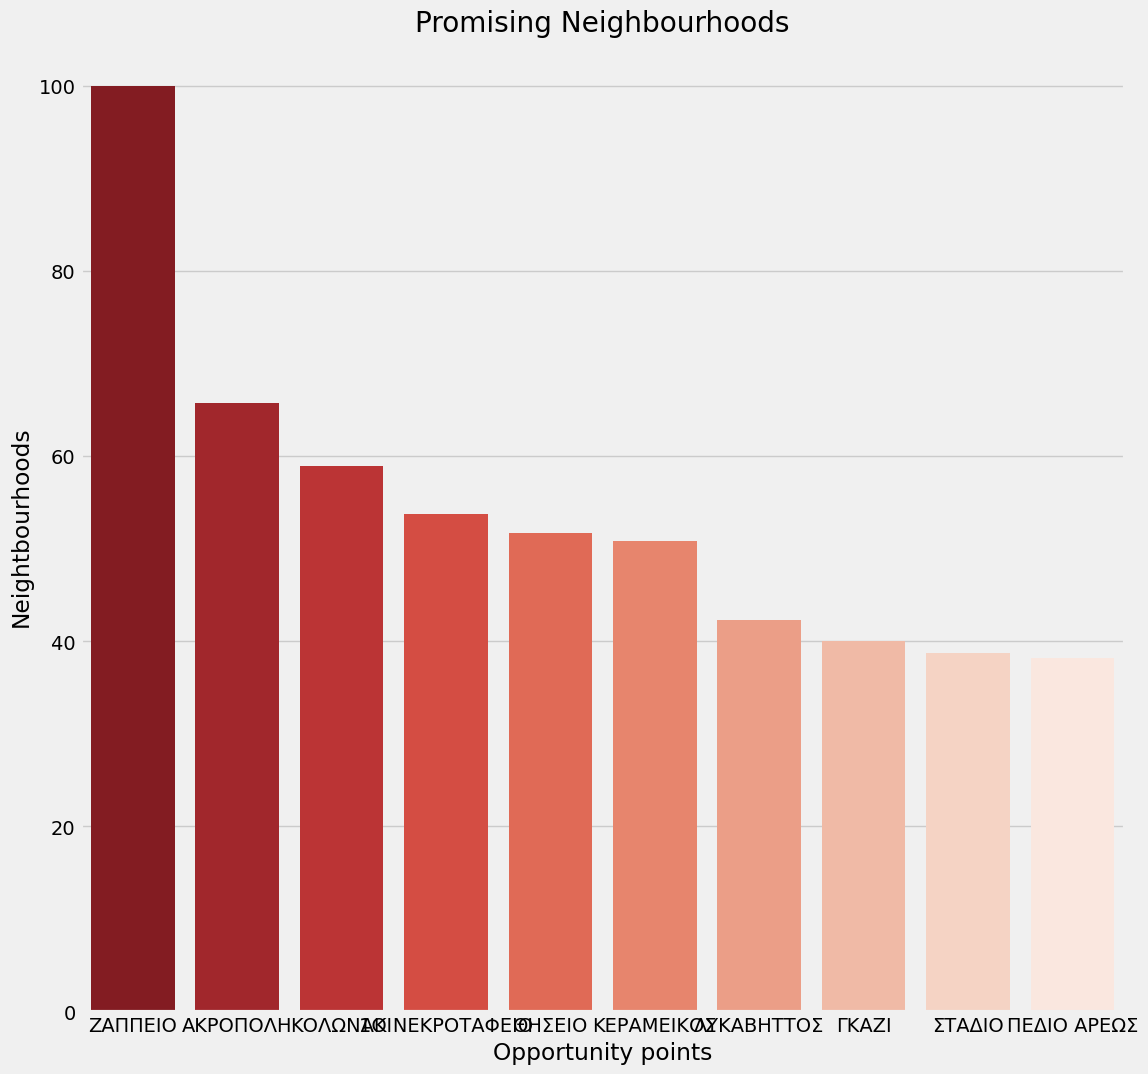

In [52]:
top10_hoods = nhood.head(10)

fig, ax = plt.subplots(figsize = (12, 12))

sns.barplot(data=top10_hoods,y = top10_hoods["total_score"],x = top10_hoods["areas"],
            order = top10_hoods["areas"],  orient = 'v', palette = "Reds_r")
plt.title("Promising Neighbourhoods")
plt.ylabel("Neightbourhoods")
plt.xlabel("Opportunity points")
None

In [53]:
nhood["CumulativePercentageMonetary"] = (nhood["monerary"].cumsum()/ 
                                      nhood["monerary"].sum()*100).round(2)

In [54]:
nhood["CumulativePercentageReviews"] = (nhood["number_of_reviews"].cumsum()/ 
                                      nhood["number_of_reviews"].sum()*100).round(2)

In [55]:
nhood.head(1)

,areas,monerary,listings,number_of_reviews,daily_area_earning,Evaluated_listing,Evaluated_pricing,weighted_calc,total_score,monetary%,CumulativePercentageMonetary,CumulativePercentageReviews
16,ΖΑΠΠΕΙΟ,158.0,118,11267,18644.0,92.439185,100.0,9243.918475,100.0,4.826546,4.83,2.34


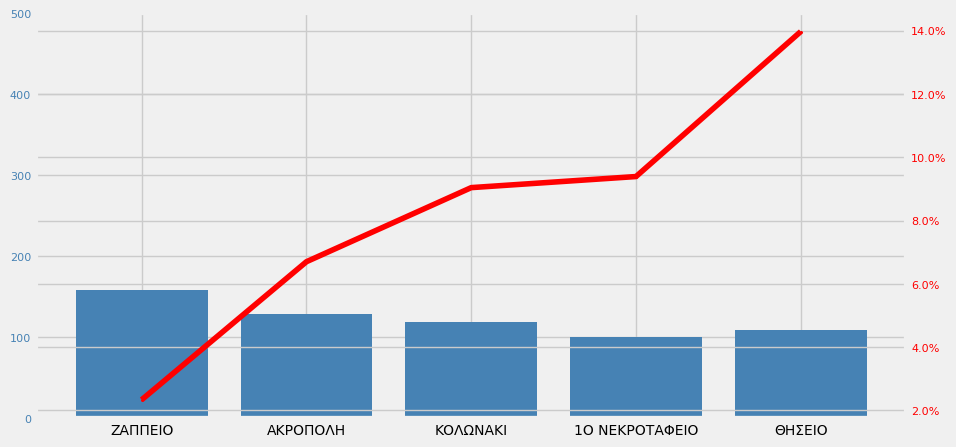

In [56]:
nhood=nhood.head()
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(nhood['areas'], nhood['monerary'], color=color1)


plt.ylim(0,500)
    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(nhood['areas'], nhood['CumulativePercentageReviews'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 10)

plt.show()

# 2. Superhost occupancy

In [57]:
df['host_is_superhost'] = df['host_is_superhost'].replace('True', 'Superhost')
df['host_is_superhost'] = df['host_is_superhost'].replace('False', 'Regular_host')

In [58]:
df.groupby('host_is_superhost')['id'].count().reset_index()

,host_is_superhost,id
0,Regular_host,5515
1,Superhost,3757


In [59]:
df.groupby('host_is_superhost')['price'].mean().reset_index()

,host_is_superhost,price
0,Regular_host,81.471079
1,Superhost,97.907639


In [60]:
df2=df.groupby('host_is_superhost').agg({'host_is_superhost':'count', 'number_of_reviews': 'sum', 'review_scores_rating': np.mean, 'price': np.mean}) 
df2['reviews_per_host'] = df2['number_of_reviews']/df2['host_is_superhost']
df2 = df2[['reviews_per_host', 'review_scores_rating', 'price']]

In [61]:
df3 = df2['price'].reset_index()
df3

,host_is_superhost,price
0,Regular_host,81.471079
1,Superhost,97.907639


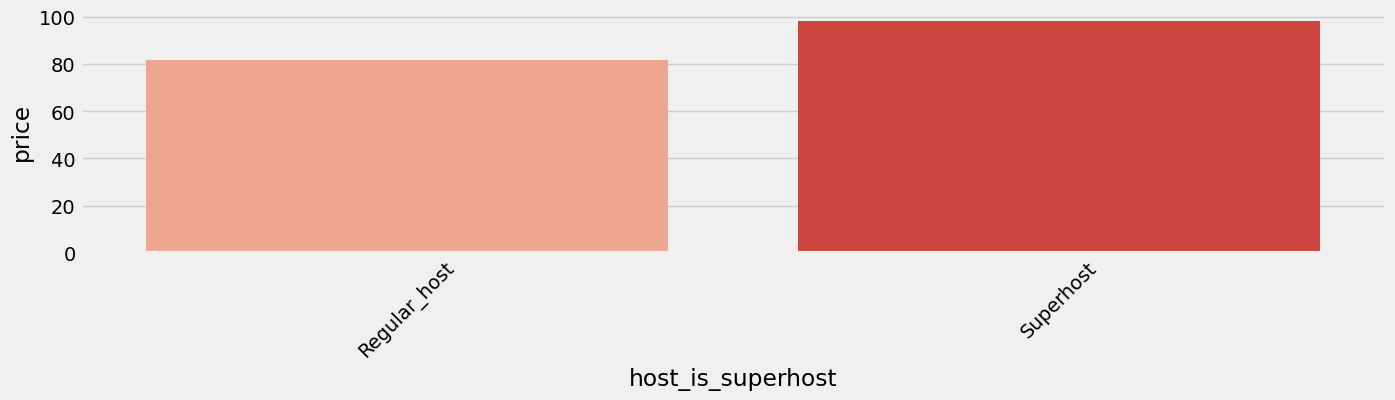

In [62]:
plt.figure(figsize=(15,3))
ax = sns.barplot(x='host_is_superhost', y = 'price', palette = "Reds", data=df3)
plt.setp(ax.get_xticklabels(), rotation=45)


None

------------------------------------

# Reviews

In [65]:
reviews = pd.read_csv('reviews-2.csv',low_memory=False)

In [66]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536698 entries, 0 to 536697
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     536698 non-null  int64 
 1   id             536698 non-null  int64 
 2   date           536698 non-null  object
 3   reviewer_id    536698 non-null  int64 
 4   reviewer_name  536698 non-null  object
 5   comments       536674 non-null  object
dtypes: int64(3), object(3)
memory usage: 24.6+ MB


In [67]:
reviews['review_size']=reviews['comments']

# etc

--------------------------------------

In [68]:
appartment_owners=df.groupby('host_id').agg({'id':'count'}).reset_index().sort_values(by='id',ascending=False)

In [69]:
appartment_owners[appartment_owners['host_id']==90390850]

,host_id,id
1696,90390850,61


# Tryouts

In [70]:
df.head()

,id,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,license,bathrooms_count,shared_bath,host_rating
0,42384166,337177735,2020-02-18,NaN,within an hour,100%,100%,Regular_host,NaN,"['email', 'phone']",True,False,ΝΕΟΣ ΚΟΣΜΟΣ,37.94835,23.70327,Entire home/apt,2,1 bath,1.0,1.0,"[""First aid kit"", ""Shampoo"", ""Hangers"", ""TV"", ...",35.0,2,30,21,2020-02-23,2022-09-01,4.37,4.33,4.63,4.80,4.67,4.47,4.40,True,1,0.96,00001374706,1,False,4.524286
1,31100111,90434832,2016-08-17,ειμαι Ελληνας εχω οικογενεια και μου αρέσει να...,within a few hours,100%,0%,Regular_host,NaN,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95633,23.69534,Entire home/apt,3,1 bath,1.0,3.0,"[""Hangers"", ""Bathtub"", ""Cooking basics"", ""Pati...",22.0,7,6,0,2019-06-07,2020-10-06,3.67,3.50,3.33,3.83,4.00,4.17,3.83,True,3,0.15,NaN,1,False,3.761429
2,36967991,277896558,2019-07-21,NaN,within an hour,100%,96%,Superhost,NaN,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95672,23.69589,Entire home/apt,2,1 bath,1.0,1.0,"[""Air conditioning"", ""Dishes and silverware"", ...",36.0,2,112,15,2019-07-26,2022-09-08,4.85,4.91,4.90,4.85,4.90,4.78,4.79,True,2,2.91,00000770524,1,False,4.854286
4,20824802,748818,2011-06-27,Hi everyone!\n\nThank you for considering stay...,within an hour,96%,93%,Regular_host,Kolonaki,"['email', 'phone']",True,True,ΠΕΤΡΑΛΩΝΑ,37.95961,23.70250,Entire home/apt,4,1 bath,2.0,4.0,"[""Hangers"", ""Cooking basics"", ""Elevator"", ""Sha...",120.0,1,13,9,2018-08-03,2022-07-25,5.00,4.92,5.00,5.00,4.92,4.92,5.00,True,76,0.26,1404941,1,False,4.965714
6,34796120,262360777,2019-05-17,NaN,within an hour,100%,100%,Regular_host,NaN,['phone'],True,True,ΡΟΥΦ,37.98711,23.67311,Entire home/apt,3,1 bath,1.0,1.0,"[""Hangers"", ""Private entrance"", ""Host greets y...",28.0,2,59,8,2019-06-08,2022-09-17,4.85,4.88,4.81,4.92,4.97,4.75,4.92,True,1,1.47,00001741002,1,False,4.871429


In [71]:
df[['price','neighbourhood_cleansed']].sort_values(by='price')

,price,neighbourhood_cleansed
3944,10.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
6462,10.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
6465,10.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
2884,11.0,ΝΕΟΣ ΚΟΣΜΟΣ
2883,11.0,ΝΕΟΣ ΚΟΣΜΟΣ
...,...,...
11939,3000.0,ΓΟΥΔΙ
1520,5000.0,ΝΕΟΣ ΚΟΣΜΟΣ
1217,5000.0,ΠΕΤΡΑΛΩΝΑ
3053,6586.0,ΝΕΟΣ ΚΟΣΜΟΣ


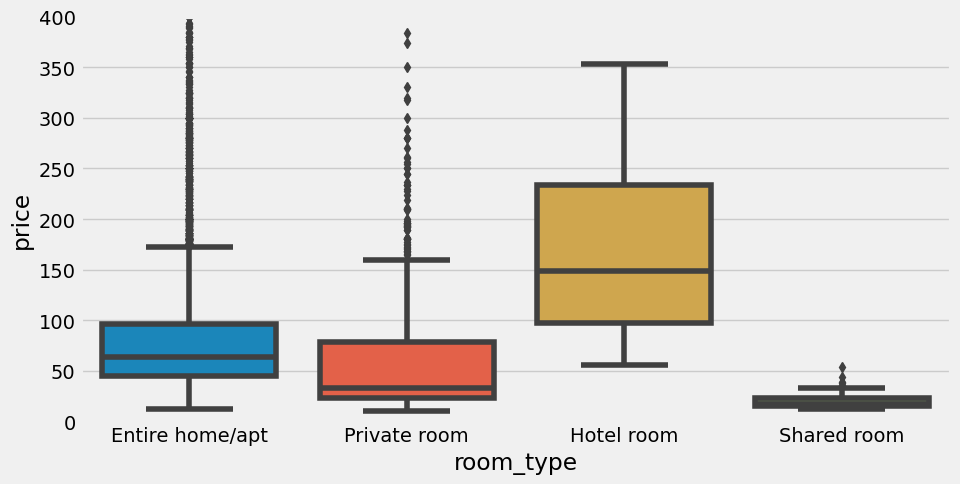

In [72]:
boxplot1 = sns.boxplot(x='room_type', y='price', data=df)
boxplot1.set_ylim([0, 400])
None

In [73]:
df.head(1)

,id,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,license,bathrooms_count,shared_bath,host_rating
0,42384166,337177735,2020-02-18,NaN,within an hour,100%,100%,Regular_host,NaN,"['email', 'phone']",True,False,ΝΕΟΣ ΚΟΣΜΟΣ,37.94835,23.70327,Entire home/apt,2,1 bath,1.0,1.0,"[""First aid kit"", ""Shampoo"", ""Hangers"", ""TV"", ...",35.0,2,30,21,2020-02-23,2022-09-01,4.37,4.33,4.63,4.8,4.67,4.47,4.4,True,1,0.96,00001374706,1,False,4.524286


In [74]:
df['no_licence']=df['license'].isna()

In [75]:
df.head(1)

,id,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,license,bathrooms_count,shared_bath,host_rating,no_licence
0,42384166,337177735,2020-02-18,NaN,within an hour,100%,100%,Regular_host,NaN,"['email', 'phone']",True,False,ΝΕΟΣ ΚΟΣΜΟΣ,37.94835,23.70327,Entire home/apt,2,1 bath,1.0,1.0,"[""First aid kit"", ""Shampoo"", ""Hangers"", ""TV"", ...",35.0,2,30,21,2020-02-23,2022-09-01,4.37,4.33,4.63,4.8,4.67,4.47,4.4,True,1,0.96,00001374706,1,False,4.524286,False


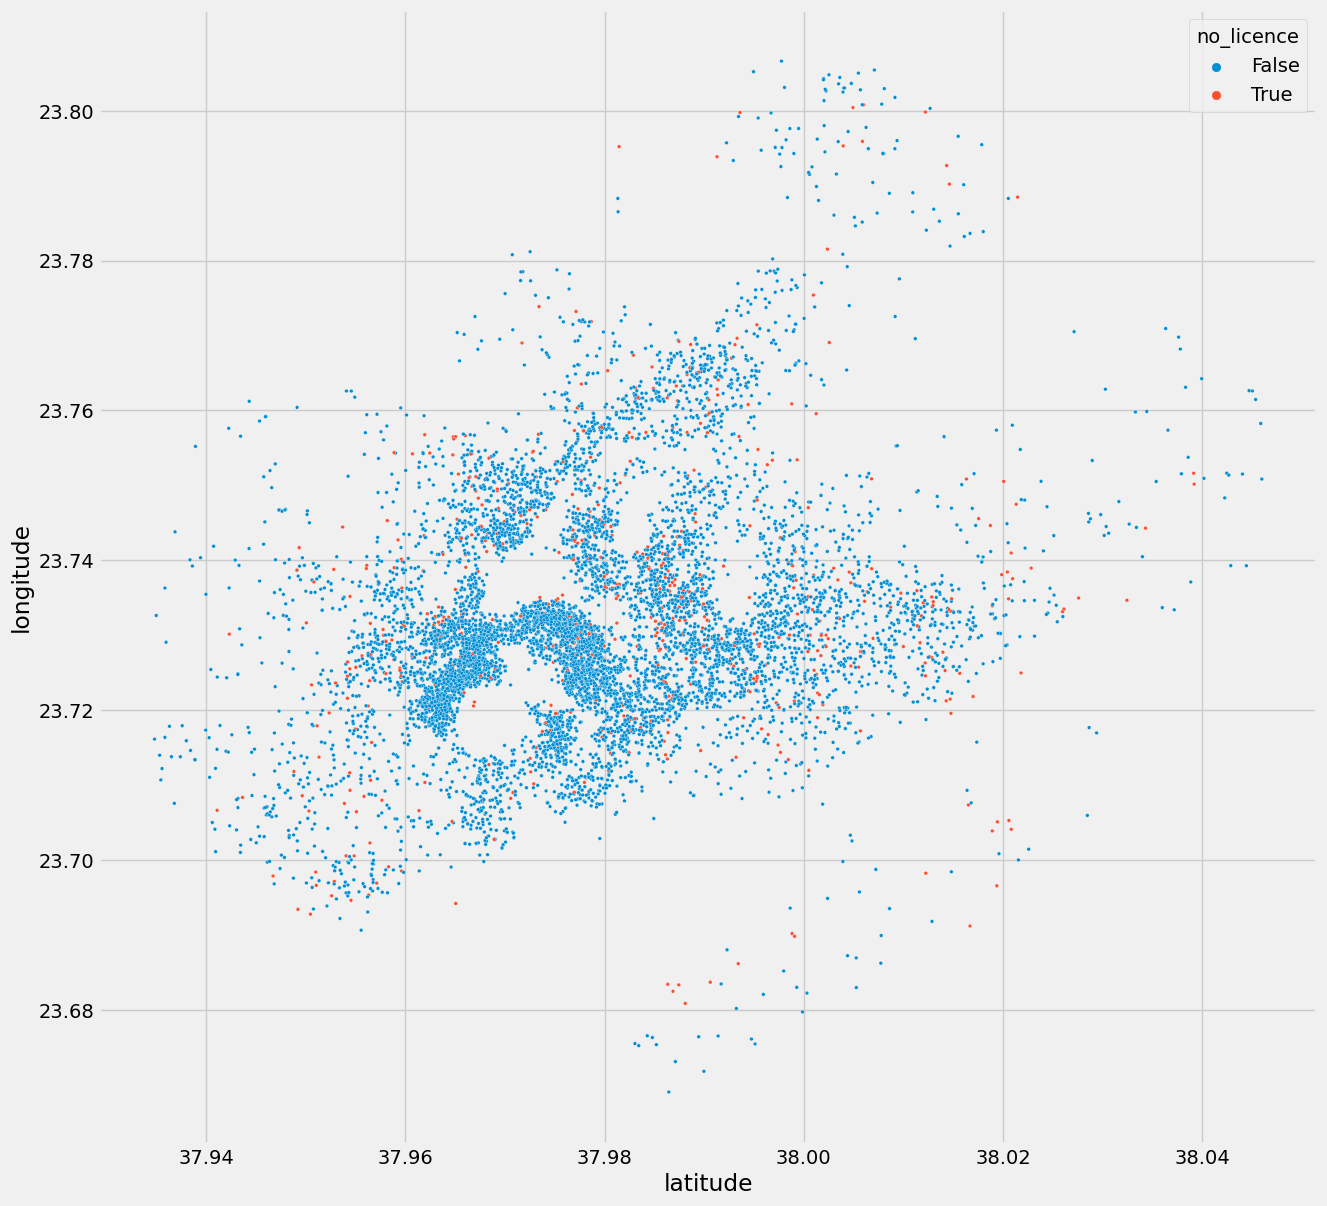

In [76]:
plt.figure(figsize=(14,14))
sns.scatterplot(data = df, x = 'latitude', y = 'longitude',hue='no_licence',s=[7])
None

In [77]:
nhood=df.groupby('neighbourhood_cleansed').agg({'id':pd.Series.nunique,'price':np.average,'minimum_nights':np.average,'number_of_reviews':np.sum}).reset_index()
nhood['total_earnings']=nhood['minimum_nights']*nhood['number_of_reviews']*nhood['price']/nhood['id']
nhood.sort_values(by='total_earnings',ascending=False,inplace=True)

In [78]:
df10=df_host.groupby(by='host_id').agg({'host_rating': np.mean,'number_of_verifications': np.average, 'id': 'count'}).reset_index()
df10['new_number_of_verifications']=df10['number_of_verifications']/df10['number_of_verifications'].max()
df10

,host_id,host_rating,number_of_verifications,id,new_number_of_verifications
0,37177,4.848810,2.0,7,0.666667
1,70840,4.828571,2.0,1,0.666667
2,102433,NaN,2.0,1,0.666667
3,109363,4.904286,2.0,1,0.666667
4,121318,4.896429,2.0,2,0.666667
...,...,...,...,...,...
5937,479322505,4.428571,1.0,1,0.333333
5938,479329329,5.000000,2.0,1,0.666667
5939,479512489,4.285714,1.0,1,0.333333
5940,479606828,NaN,2.0,1,0.666667


In [79]:
nhood.head()

,neighbourhood_cleansed,id,price,minimum_nights,number_of_reviews,total_earnings
17,ΘΗΣΕΙΟ,266,108.969925,7.060150,21987,63592.359966
5,ΑΚΡΟΠΟΛΗ,282,128.297872,3.911348,20949,37278.638861
21,ΚΟΛΩΝΑΚΙ,275,118.945455,7.185455,11227,34892.583425
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,53,67.792453,7.905660,3178,32136.422187
34,ΠΕΤΡΑΛΩΝΑ,358,84.173184,8.086592,13883,26396.089712


#### Plot Segments in a Treemap

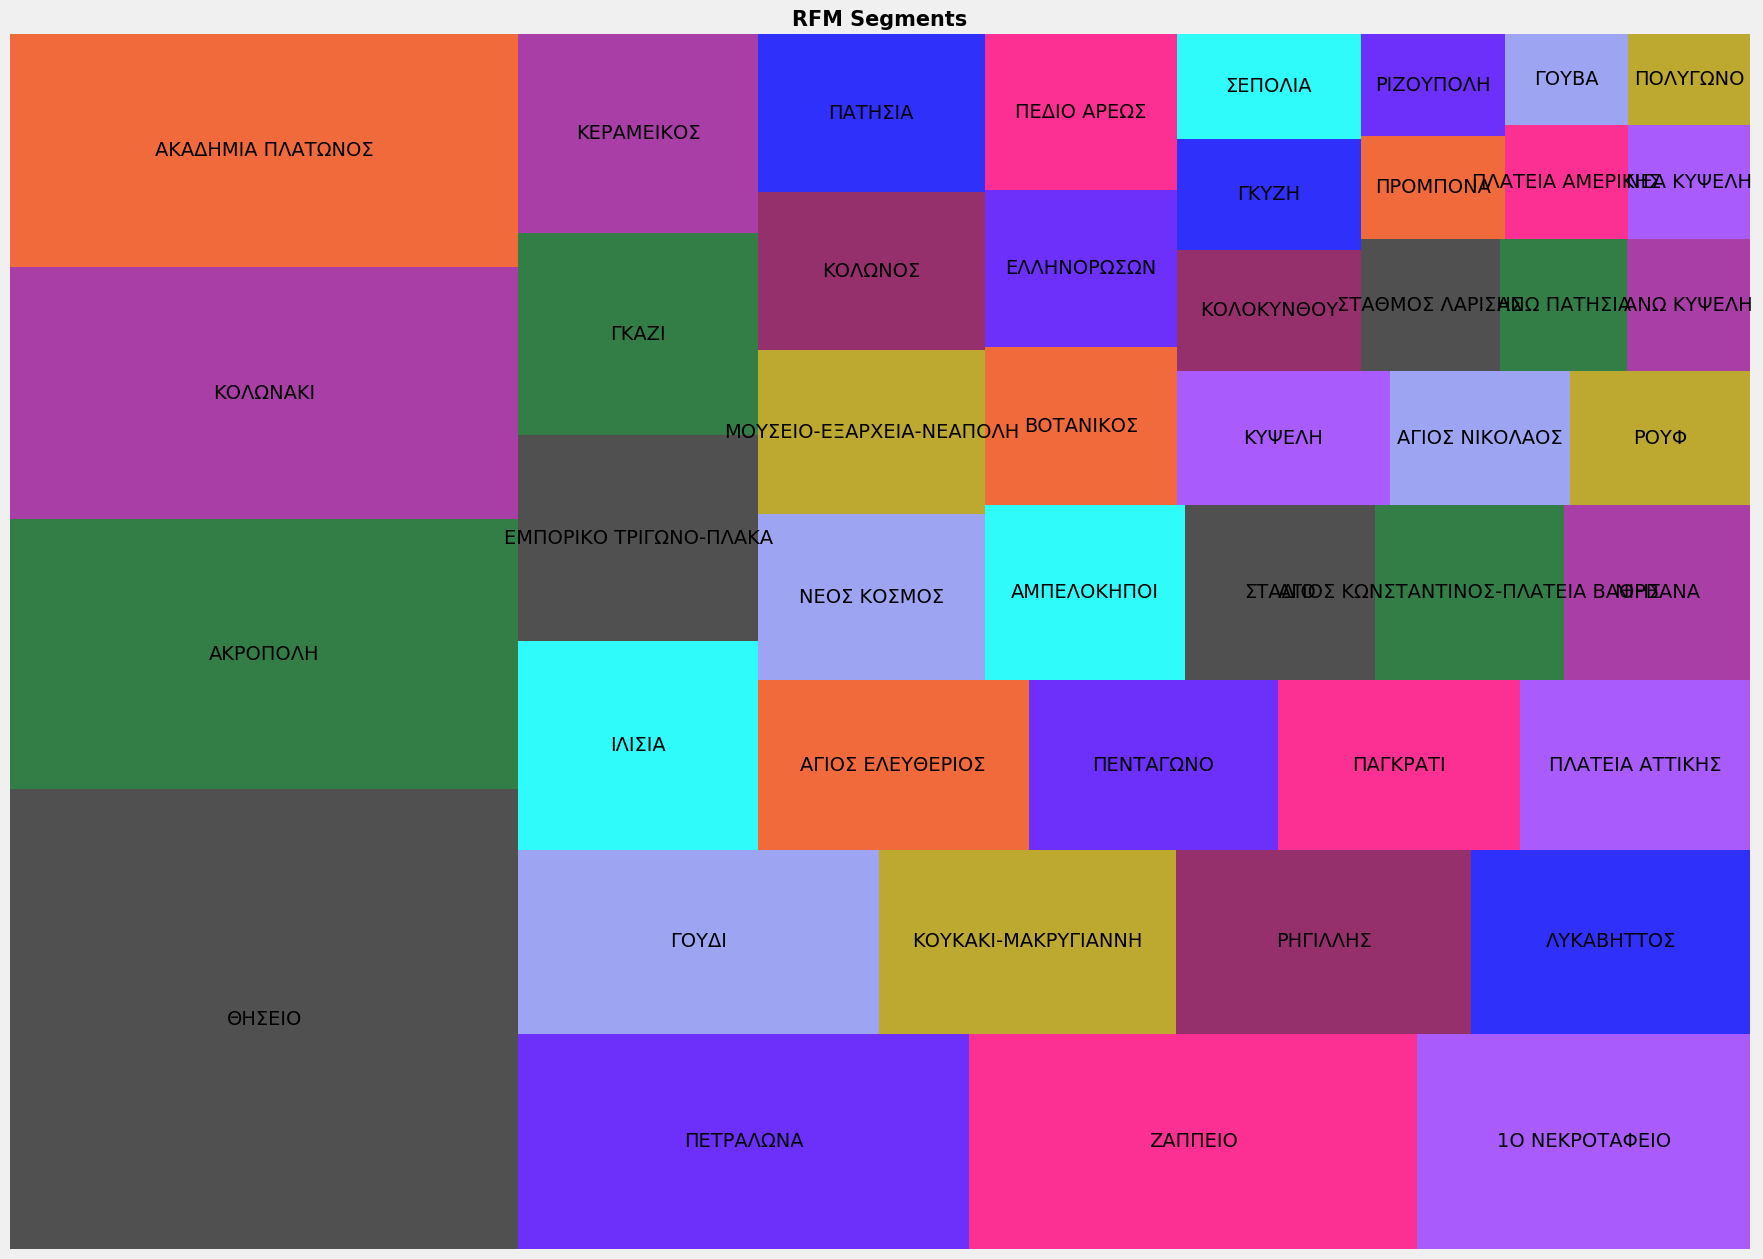

In [84]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 15)
sq.plot(sizes=nhood["total_earnings"], 
                      label=nhood['neighbourhood_cleansed'], 
                            alpha=0.8, 
                            color=["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C", "blue", "cyan"])#"#A4E919"
plt.title("RFM Segments", fontsize=15, fontweight="bold")
plt.axis('off')
plt.show()

In [85]:
#df.head()